# **Taxa de Suicídio x Redes Sociais**

Este conjunto de dados explora o impacto do uso das redes sociais nas taxas de suicídio, apresentando uma análise baseada em dados de plataformas de redes sociais e estatísticas de taxas de suicídio da OMS. É um recurso valioso para pesquisadores, cientistas de dados e analistas que buscam entender a correlação entre o aumento da atividade nas redes sociais e as taxas de suicídio em diferentes regiões e demografias.

Dados de Taxa de Suicídio da OMS (SDGSUICIDE): Obtidos a partir da exportação de dados da OMS, que acompanha as taxas globais de suicídio.

Dados de Uso das Redes Sociais: Informações provenientes de grandes plataformas de redes sociais, extraídas do Kaggle, complementadas com dados de:

- Facebook: Statista
- Twitter: Relações com Investidores do Twitter
- Instagram: Relações com Investidores do Facebook

**Variáveis:**
  -	year: Ano
  - sex: Sexo
  - Suicide Rate % change since 2010: Taxa de suicídio (%) desde 2010
  - Twitter user count % change since 2010: Contagem de usuários do Twitter desde 2010
  - Facebook user count % change since 2010: Contagem de usuários do Facebook desde 2010

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('smsri.csv')
df.head()

,year,sex,Suicide Rate % change since 2010,Twitter user count % change since 2010,Facebook user count % change since 2010
0,2010,BTSX,100.000000,100.000000,100.000000
1,2010,FMLE,100.000000,100.000000,100.000000
2,2010,MLE,100.000000,100.000000,100.000000
3,2011,BTSX,98.681894,216.666667,138.980263
4,2011,FMLE,98.183773,216.666667,138.980263


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     30 non-null     int64  
 1   sex                                      30 non-null     object 
 2   Suicide Rate % change since 2010         30 non-null     float64
 3   Twitter user count % change since 2010   30 non-null     float64
 4   Facebook user count % change since 2010  30 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
df.shape

(30, 5)

In [ ]:
df['sex'].value_counts()

,count
sex,
BTSX,10
FMLE,10
MLE,10


In [ ]:
df.isnull().sum()

,0
year,0
sex,0
Suicide Rate % change since 2010,0
Twitter user count % change since 2010,0
Facebook user count % change since 2010,0


In [ ]:
df.isna().sum()

,0
year,0
sex,0
Suicide Rate % change since 2010,0
Twitter user count % change since 2010,0
Facebook user count % change since 2010,0


In [ ]:
df.describe()

,year,Suicide Rate % change since 2010,Twitter user count % change since 2010,Facebook user count % change since 2010
count,30.000000,30.000000,30.000000,30.000000
mean,2014.500000,93.837274,462.777778,255.394737
std,2.921384,4.688130,177.734769,101.498351
min,2010.000000,85.269171,100.000000,100.000000
25%,2012.000000,89.530913,342.592593,173.684211
50%,2014.500000,94.478128,549.074074,245.394737
75%,2017.000000,98.051267,594.444444,350.164474
max,2019.000000,100.000000,629.629630,410.855263


In [ ]:
df = df.rename(columns={'Suicide Rate % change since 2010': 'Suicide_Rates',
                        'Twitter user count % change since 2010': 'Twitter_Users',
                        'Facebook user count % change since 2010': 'Facebook_Users'})
df.head(2)

,year,sex,Suicide_Rates,Twitter_Users,Facebook_Users
0,2010,BTSX,100.0,100.0,100.0
1,2010,FMLE,100.0,100.0,100.0


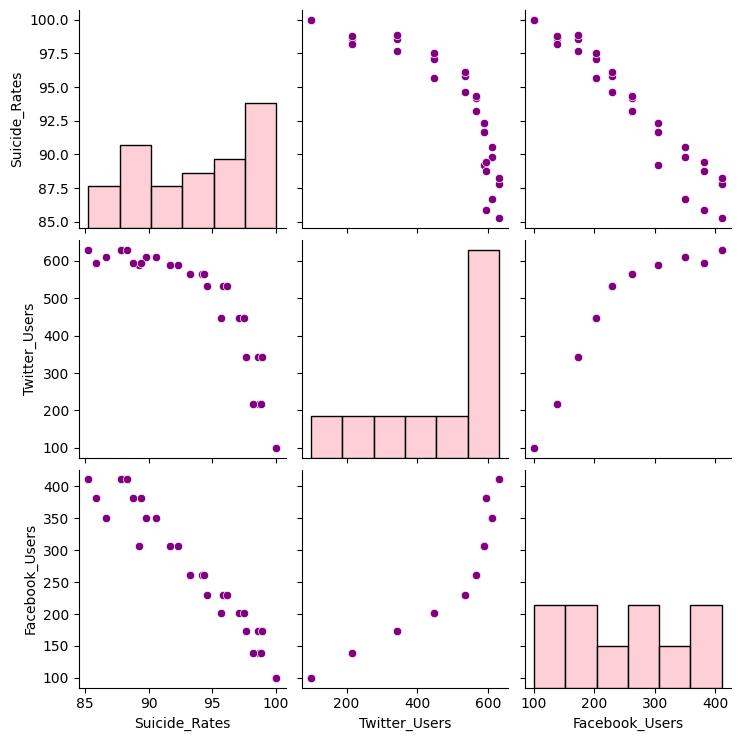

In [ ]:
plt.figsize = (10, 6)
sns.pairplot(df[['Suicide_Rates', 'Twitter_Users', 'Facebook_Users']],
             plot_kws={'color': 'purple'}, diag_kws={'color': 'pink'})
plt.show()

<ipython-input-107-da4cd0792635>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='Suicide_Rates', ci=None, color='purple')


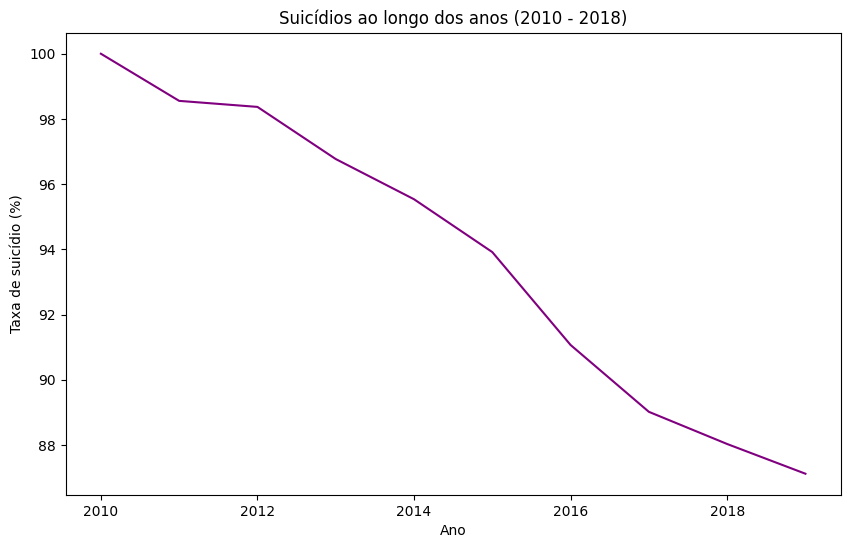

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Suicide_Rates', ci=None, color='purple')
plt.title('Suicídios ao longo dos anos (2010 - 2018)')
plt.xlabel('Ano')
plt.ylabel('Taxa de suicídio (%)')
plt.show()

<ipython-input-108-1b17246810bf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='Twitter_Users', ci=None, color='cyan')


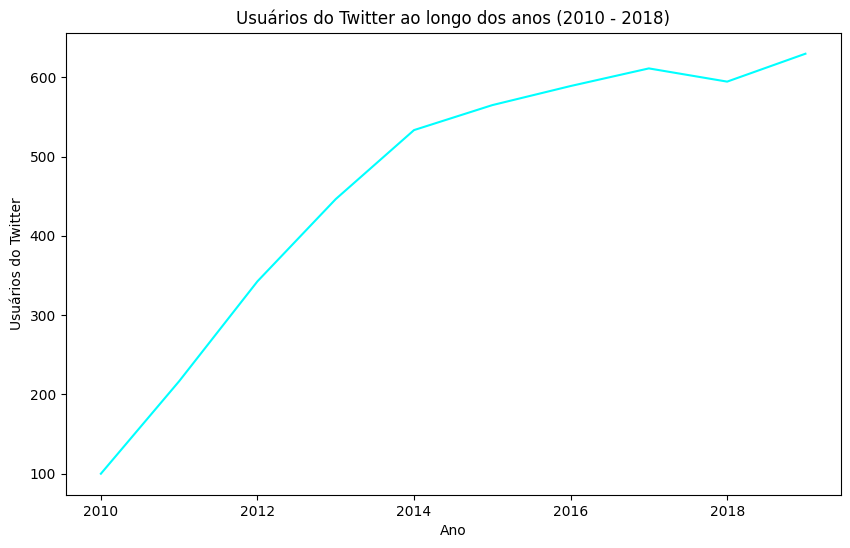

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Twitter_Users', ci=None, color='cyan')
plt.title('Usuários do Twitter ao longo dos anos (2010 - 2018)')
plt.xlabel('Ano')
plt.ylabel('Usuários do Twitter')
plt.show()

<ipython-input-109-49468fc388f5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='Facebook_Users', color='blue', ci=None)


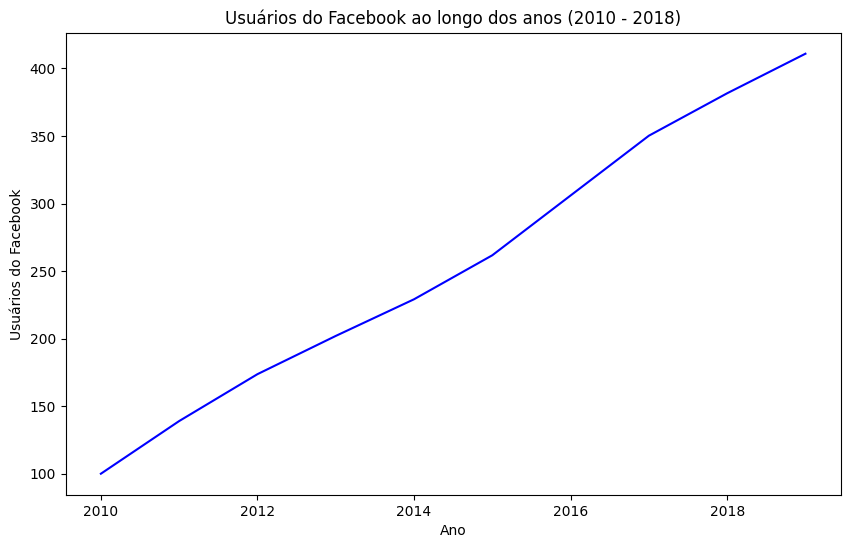

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Facebook_Users', color='blue', ci=None)
plt.title('Usuários do Facebook ao longo dos anos (2010 - 2018)')
plt.xlabel('Ano')
plt.ylabel('Usuários do Facebook')
plt.show()

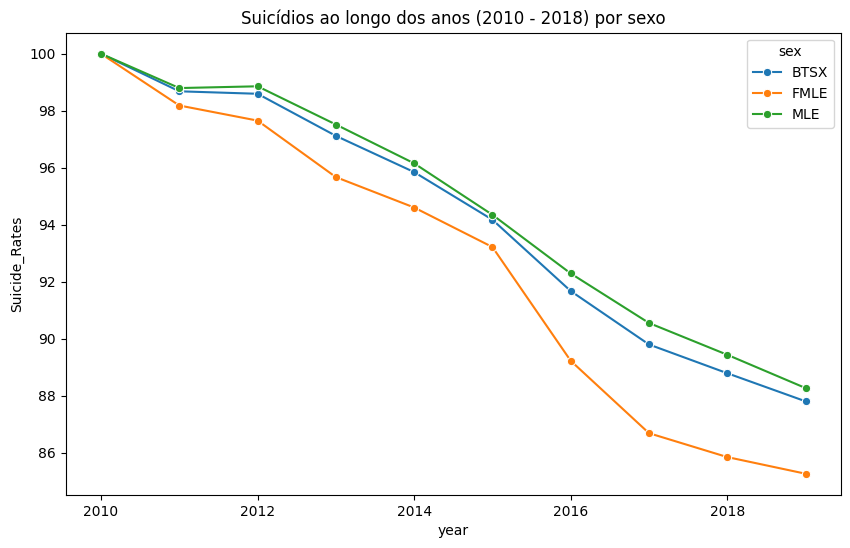

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Suicide_Rates', hue='sex', marker='o')
plt.title('Suicídios ao longo dos anos (2010 - 2018) por sexo')
plt.show()

### **Verificando outliers**

<ipython-input-111-2d9ce2ae755d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='Suicide_Rates', palette='Set1')


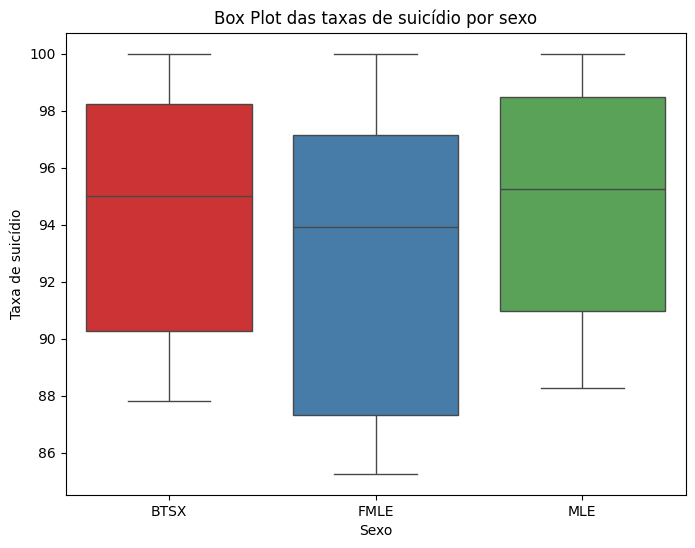

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='Suicide_Rates', palette='Set1')
plt.title('Box Plot das taxas de suicídio por sexo')
plt.xlabel('Sexo')
plt.ylabel('Taxa de suicídio')
plt.show()

<ipython-input-112-ff2a4a0048ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='Facebook_Users', palette='Set1')


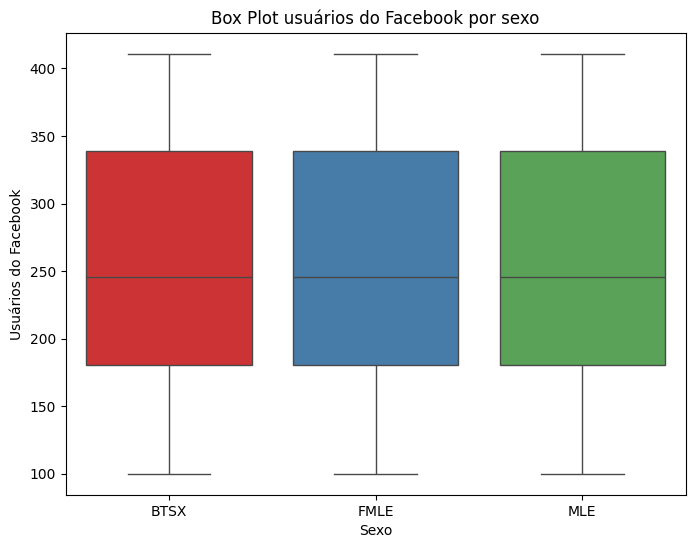

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='Facebook_Users', palette='Set1')
plt.title('Box Plot usuários do Facebook por sexo')
plt.xlabel('Sexo')
plt.ylabel('Usuários do Facebook')
plt.show()

<ipython-input-113-dfc99669e009>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='Twitter_Users', palette='Set1')


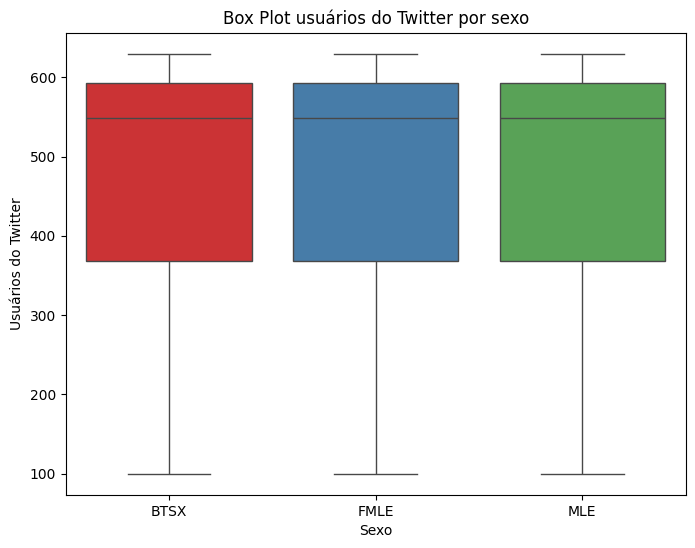

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='Twitter_Users', palette='Set1')
plt.title('Box Plot usuários do Twitter por sexo')
plt.xlabel('Sexo')
plt.ylabel('Usuários do Twitter')
plt.show()

<ipython-input-114-2c4c10239953>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='year', y='Suicide_Rates', palette='Set1')


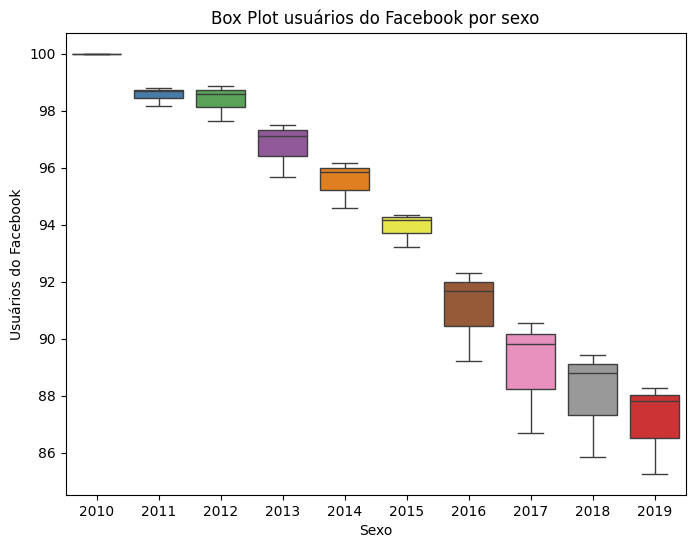

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='year', y='Suicide_Rates', palette='Set1')
plt.title('Box Plot usuários do Facebook por sexo')
plt.xlabel('Sexo')
plt.ylabel('Usuários do Facebook')
plt.show()

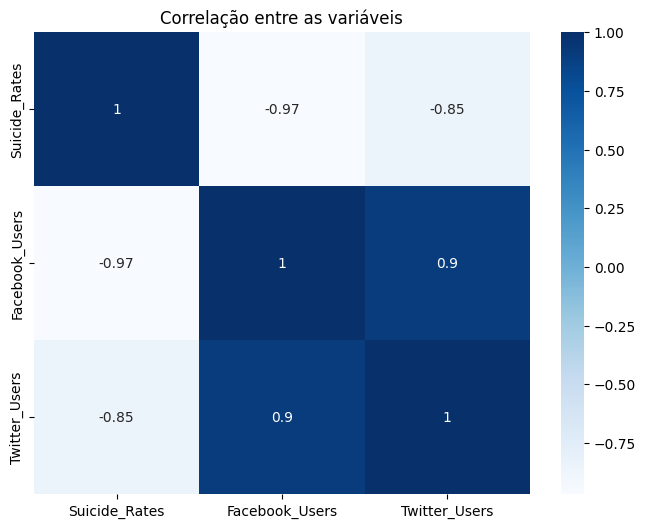

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(df[['Suicide_Rates', 'Facebook_Users', 'Twitter_Users']].corr(),
            annot=True, cmap='Blues')
plt.title("Correlação entre as variáveis")
plt.show()

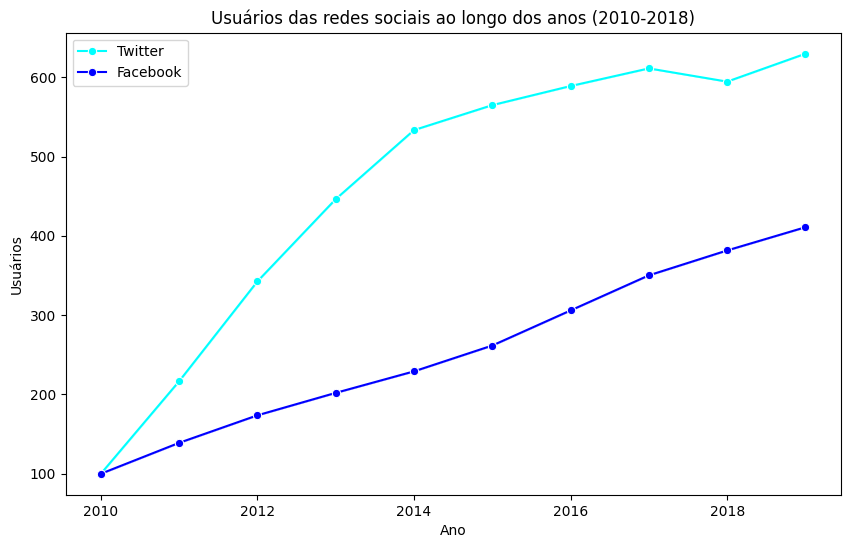

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='Twitter_Users', label='Twitter', marker='o', color='cyan')
sns.lineplot(data=df, x='year', y='Facebook_Users', label='Facebook', marker='o', color='blue')
plt.title('Usuários das redes sociais ao longo dos anos (2010-2018)')
plt.xlabel('Ano')
plt.ylabel('Usuários')
plt.legend()
plt.show()

Sem correlação numérica entre as váriáveis das taxas de seuicídio x redes sociais.
Entretanto, as taxas de suicídio caem ao longo dos anos, ao mesmo tempo que a quantidade de usuários das redes sociais em questão aumenta. A questão de suicídio x redes sociais é muito complexa e vai muito de como as pessoas utilizam as redes sociais, muitos podem utilizar o Twitter como um diário pessoal, outros o Facebook para grupos de autoajuda. Mas as pessoas não deixam de se suicidar pela existência das redes sociais, hoje em dia, com os padrões estabelecidos de "felicidade" que vemos nas redes, muitas pessoas acreditam nunca alcançar tal ápice e isso é motivo de depressão e ansiedade em jovens e adultos. Por mais que as redes nos ajude a se conectar com pessoas, muitas vezes pessoas como nós, não é a razão pela queda das taxas de suicídio, pois essa questão é, de fato, muito mais complexa.

### **Regressão Linear do caso:**

In [ ]:
X = df[['Twitter_Users', 'Facebook_Users']]
y = df['Suicide_Rates']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42
                                               ,shuffle=True)

In [ ]:
RL = LinearRegression()
RL.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = RL.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,RL.predict(X_test),multioutput='uniform_average')
rmse = np.sqrt(mse)
print(f'Teste R²: {r2 * 100:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')

Teste R²: 91.16%
MAE: 1.03
MSE:1.23
RMSE:1.11


R² (91.16%): O modelo explica 91.16% da variabilidade dos dados, o que é um ótimo indicativo de boa performance.

MAE (1.03): O erro médio das previsões é de 1.03 unidades, o que indica uma boa precisão.

MSE (1.23): O erro quadrático médio é 1.23, um valor que penaliza mais os erros grandes.

RMSE (1.11): O erro médio das previsões, ajustado para penalizar grandes erros, é de 1.11 unidades.

### **Forecasting dos próximos 6 períodos com SARIMA**

In [ ]:
!pip install pmdarima
import pmdarima as pm
from pmdarima.arima import auto_arima

In [ ]:
#encontrando melhor pdq
auto_model = auto_arima(df['Suicide_Rates'], seasonal=True, m=12, trace=True)
print(auto_model.order)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=76.992, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=126.860, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=113.615, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=126.008, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=75.138, Time=3.92 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=73.159, Time=0.46 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=75.146, Time=3.17 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=71.482, Time=0.72 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=73.474, Time=1.61 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=73.471, Time=3.94 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=5.65 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=111.116, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=77.473, T

In [ ]:
model = ARIMA(df['Suicide_Rates'], order=(3, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=6)

forecast_values = forecast.values
print('Forecast próximos 5 períodos:')
for value in forecast_values:
    print(f'{value:.2f}%')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Forecast próximos 5 períodos:
87.03%
84.56%
87.43%
86.51%
84.11%
86.81%
